In [1]:
import numpy as np
import pandas as pd
import skimage
import cv2 as cv
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import ripser
import kmapper as km
import Analytics

## ME DATA.
We begin by reading some ME data and uploading our data frame which we created and saved via the 'Image Test' file.

In [2]:
me_ch2_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/CH2Data.csv')

In [3]:
me_ch2_data

,Frame,cell,area,centroid,centroid X,centroid Y
0,0,0,440.919265,"(1216.3932, 2036.7736)",1216.39320,2036.773600
1,0,1,615.453171,"(1262.2424, 1251.5045)",1262.24240,1251.504500
2,0,2,485.882486,"(1979.225, 1327.6854)",1979.22500,1327.685400
3,0,3,608.118827,"(924.6294, 726.18805)",924.62940,726.188050
4,0,4,175.034616,"(1245.2369, 3.5135105)",1245.23690,3.513511
...,...,...,...,...,...,...
218139,240,1052,1664.177803,"(1220.0168, 1585.9319)",1220.01680,1585.931900
218140,240,1053,1848.696195,"(335.19278, 604.8198)",335.19278,604.819800
218141,240,1054,715.592445,"(550.92975, 1482.9679)",550.92975,1482.967900
218142,240,1055,674.282003,"(1926.1735, 1977.0935)",1926.17350,1977.093500


In [4]:
a = Analytics.sample_stats(me_ch2_data)

In [5]:
a

,"Frame cell area centroid centroid X \\n0 0 0 440.919265 (1216.3932, 2036.7736) 1216.39320 \n1 0 1 615.453171 (1262.2424, 1251.5045) 1262.24240 \n2 0 2 485.882486 (1979.225, 1327.6854) 1979.22500 \n3 0 3 608.118827 (924.6294, 726.18805) 924.62940 \n4 0 4 175.034616 (1245.2369, 3.5135105) 1245.23690 \n... ... ... ... ... ... \n218139 240 1052 1664.177803 (1220.0168, 1585.9319) 1220.01680 \n218140 240 1053 1848.696195 (335.19278, 604.8198) 335.19278 \n218141 240 1054 715.592445 (550.92975, 1482.9679) 550.92975 \n218142 240 1055 674.282003 (1926.1735, 1977.0935) 1926.17350 \n218143 240 1056 474.548110 (1477.6268, 1594.341) 1477.62680 \n\n centroid Y \n0 2036.773600 \n1 1251.504500 \n2 1327.685400 \n3 726.188050 \n4 3.513511 \n... ... \n218139 1585.931900 \n218140 604.819800 \n218141 1482.967900 \n218142 1977.093500 \n218143 1594.341000 \n\n[218144 rows x 6 columns]"
Min Count,237.000000
Max Count,1132.000000
Average Count,905.161826
Std Count,171.364292
Avg Count ROC,1.712500
Min Gini Index,0.208821
Max Gini Index,0.427215
Avg Gini Index,0.251722


In [43]:
frame0 = me_ch2_data[me_ch2_data['Frame']==0]
frame240 = me_ch2_data[me_ch2_data['Frame']==240]

Text(0.5, 1.0, 'ME Channel 2 Frame 0')

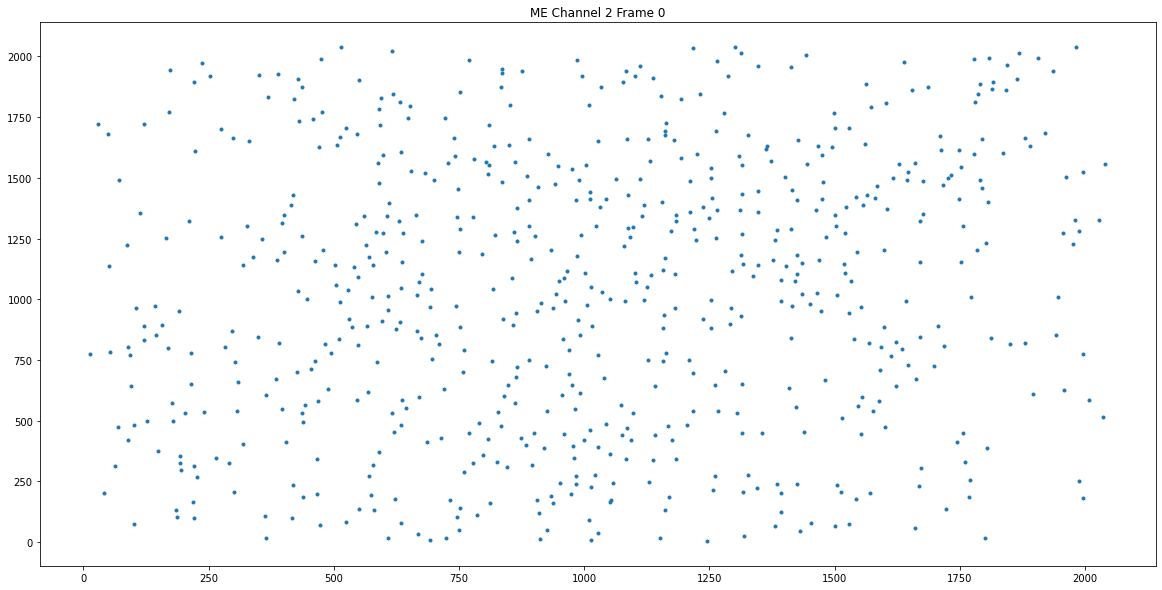

In [6]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(frame0['centroid X'],frame0['centroid Y'], '.')
ax.set_title('ME Channel 2 Frame 0')

Text(0.5, 1.0, 'ME Channel 2 Frame 240')

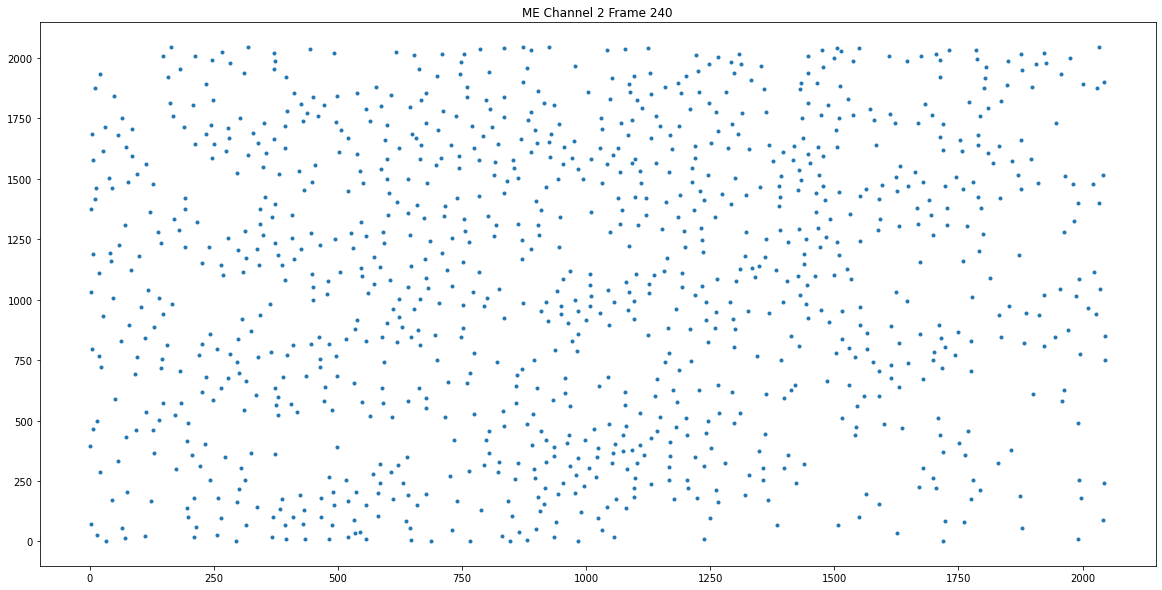

In [7]:
g, bx = plt.subplots(1, figsize=(20,10))
bx.plot(frame240['centroid X'], frame240['centroid Y'], '.')
bx.set_title('ME Channel 2 Frame 240')

In [8]:
frame0['centroid X'].max()

2039.2418

In [9]:
frame0['centroid Y'].max()

2039.4181

In [12]:
frame0

NameError: name 'frame0' is not defined

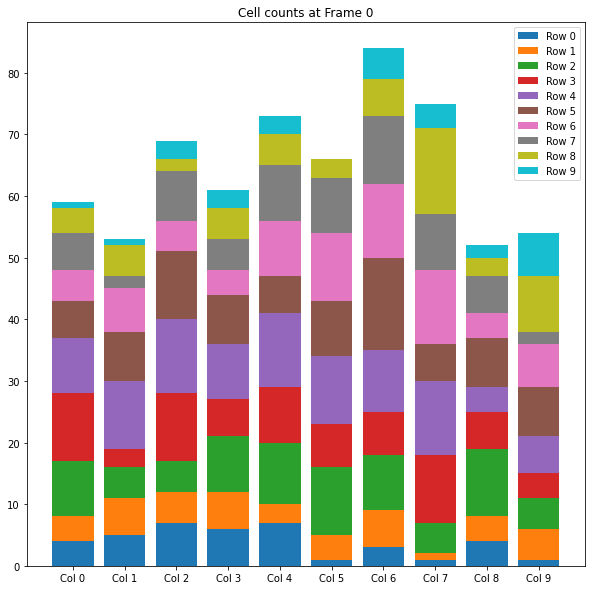

In [11]:
c = Analytics.count_cells(frame0, num_rows = 10, graph=True)

In [12]:
Analytics.Gini(c)

0.29130030959752323

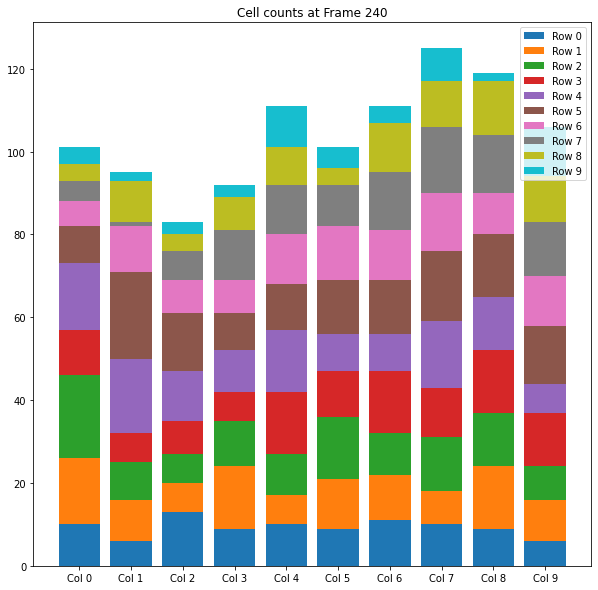

In [13]:
d = Analytics.count_cells(frame240, num_rows = 10, graph=True)

In [14]:
Analytics.Gini(d)

0.2125478927203065

### Now let's compute Gini index over every frame in the Channel 2 data set.

In [52]:
me_ginis = []
for i in range(me_ch2_data['Frame'].max()+1):
    if i % 2 == 0:
        frame = me_ch2_data[me_ch2_data['Frame']==i]
        c = Analytics.count_cells(frame, num_rows = 10)
        g = Analytics.Gini(c)
        me_ginis.append(g)

Text(0.5, 1.0, 'Gini Coefficient across ME Channel 2 Frames')

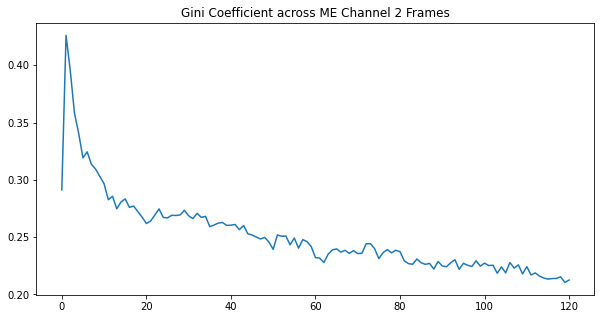

In [53]:
f, a = plt.subplots(figsize=(10,5))
a.plot(np.arange((me_ch2_data['Frame'].max())/2+1),me_ginis)
plt.title('Gini Coefficient across ME Channel 2 Frames')

## Clustering Counts with Pad Shift
We now want to observe clustering with a intersection between our bins. We will count these with `pad_count_cells` 

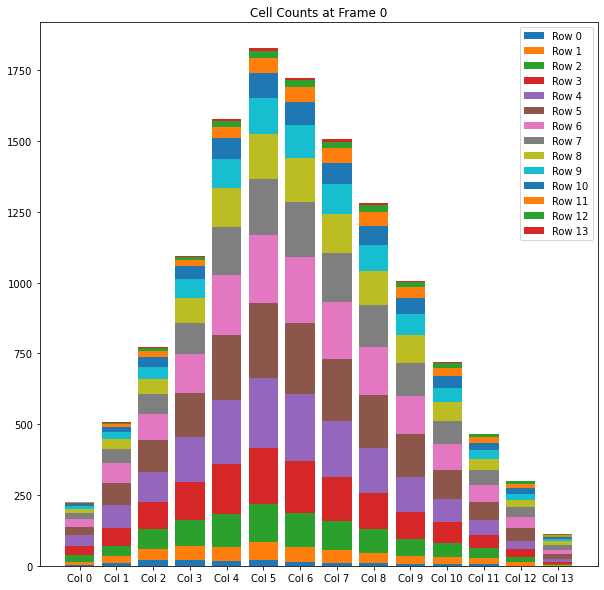

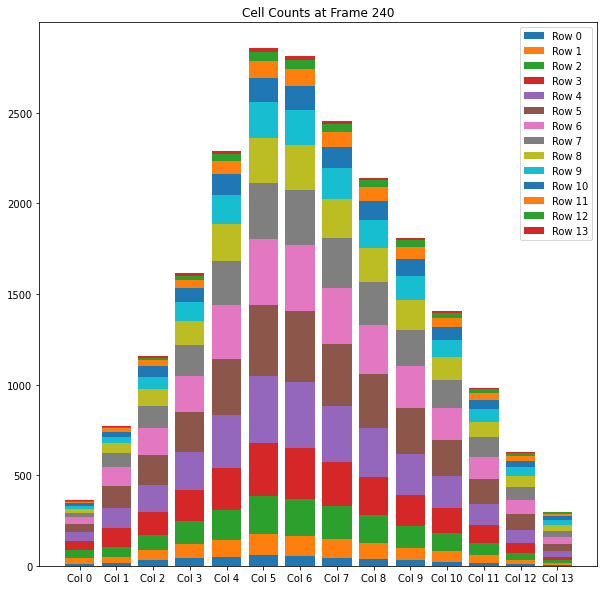

In [17]:
pc0 = Analytics.pad_count_cells(frame0, graph = True)
pc240 = Analytics.pad_count_cells(frame240, graph=True)

## HC Data.
We now want to compare these with charts we construct with healthy control data.

In [28]:
hc_ch2_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH2_Data.csv')

In [29]:
hcf0 = hc_ch2_df[hc_ch2_df['Frame'] == 0]
hcf120 = hc_ch2_df[hc_ch2_df['Frame'] == 120]

array([  1.,  13.,  17.,  20.,  22.,  22.,  19.,  15.,  12.,   9.,   4.,
         4.,   1.,   1.,   9.,  29.,  38.,  50.,  54.,  64.,  61.,  48.,
        39.,  32.,  23.,  18.,  11.,   6.,  21.,  39.,  59.,  85.,  94.,
       111., 109.,  92.,  71.,  55.,  45.,  33.,  18.,  10.,  37.,  49.,
        87., 128., 146., 164., 148., 126.,  97.,  75.,  57.,  44.,  22.,
        11.,  54.,  74., 120., 150., 181., 195., 169., 144., 115.,  88.,
        68.,  49.,  26.,  12.,  63.,  75., 130., 163., 207., 214., 182.,
       158., 129.,  95.,  68.,  47.,  25.,  12.,  61.,  67., 121., 152.,
       192., 195., 163., 139., 115.,  86.,  62.,  41.,  22.,  11.,  56.,
        56., 104., 131., 158., 164., 139., 119.,  96.,  74.,  56.,  39.,
        20.,  11.,  45.,  51.,  89., 105., 132., 134., 114.,  97.,  81.,
        61.,  47.,  30.,  17.,   9.,  30.,  37.,  70.,  79., 104., 103.,
        86.,  76.,  65.,  49.,  37.,  21.,  12.,   8.,  23.,  20.,  48.,
        56.,  74.,  71.,  59.,  52.,  46.,  34.,  2

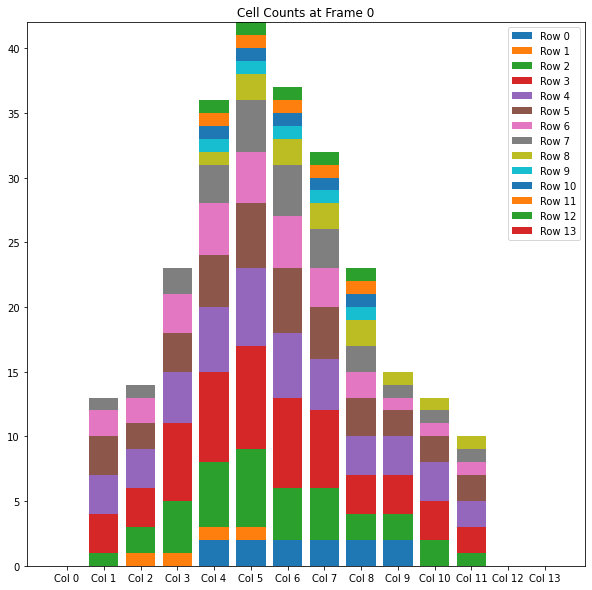

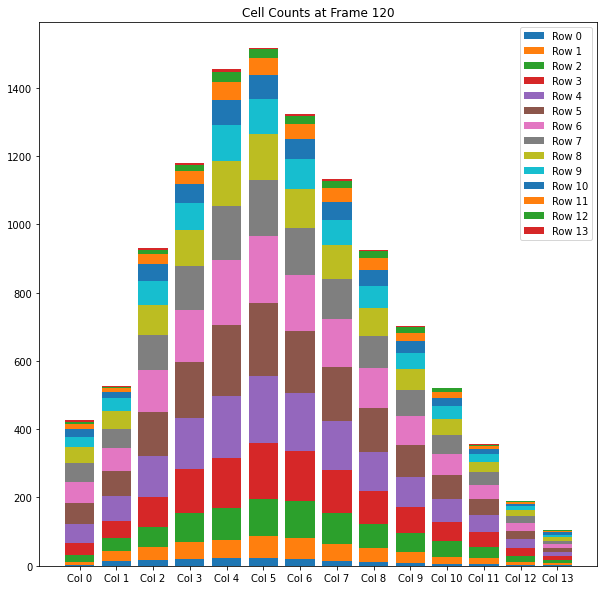

In [30]:
Analytics.pad_count_cells(hcf0,graph=True)
Analytics.pad_count_cells(hcf120,graph=True)

array([ 1.,  8.,  8.,  3.,  7.,  5.,  6.,  2.,  3.,  1.,  3.,  6.,  8.,
        2.,  5.,  3.,  8.,  4.,  5.,  6.,  7.,  5., 10.,  6., 11., 12.,
        4.,  5.,  7.,  3.,  6.,  7.,  9.,  9.,  7.,  8.,  5.,  6.,  9.,
        6., 10.,  9.,  4.,  6.,  8.,  4., 15.,  6.,  1.,  5., 13.,  3.,
        8.,  7., 11., 12.,  5.,  3.,  6.,  4., 18., 14.,  7.,  8., 11.,
        8.,  8.,  3.,  4.,  5.,  9.,  8.,  5.,  9., 12.,  2.,  5.,  5.,
        8.,  4.,  9.,  4.,  7.,  5.,  8.,  7.,  9.,  4.,  0.,  3.,  7.,
        1.,  2.,  8.,  2.,  2.,  6.,  6.,  3.,  2.])

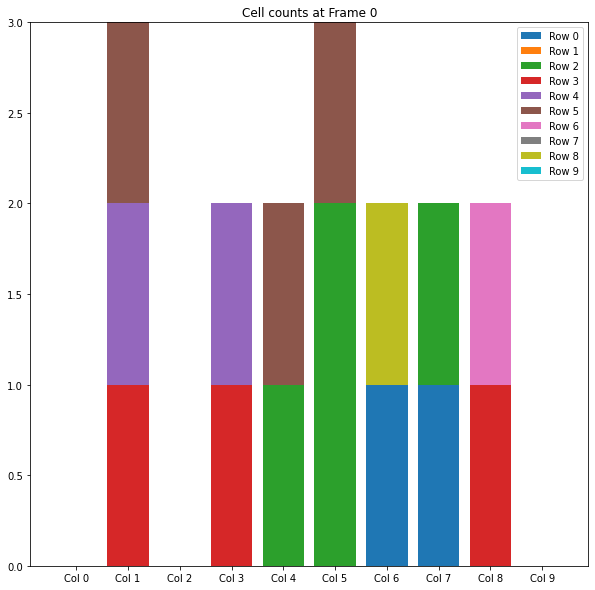

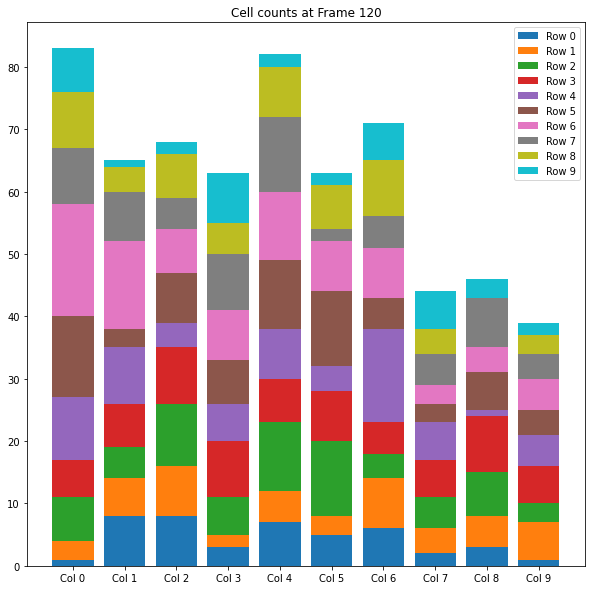

In [31]:
Analytics.count_cells(hcf0, graph = True)
Analytics.count_cells(hcf120, graph = True)

Text(0.5, 1.0, 'Healthy Control Channel 2 Frame 0')

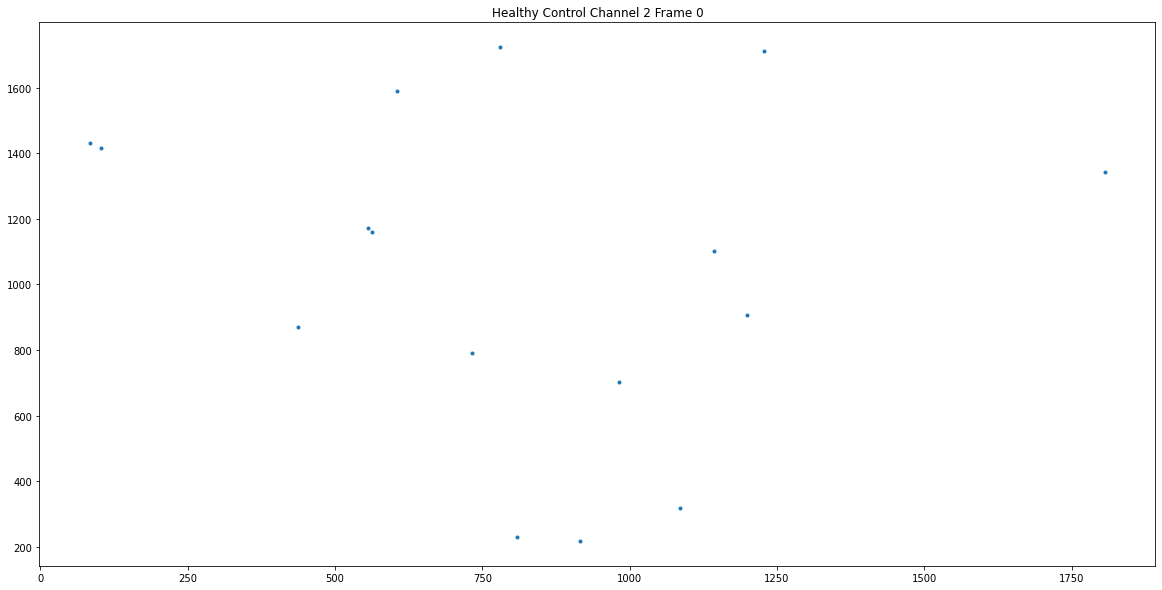

In [32]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(hcf0['centroid X'],hcf0['centroid Y'], '.')
ax.set_title('Healthy Control Channel 2 Frame 0')

Text(0.5, 1.0, 'Healthy Control Channel 2 Frame 120')

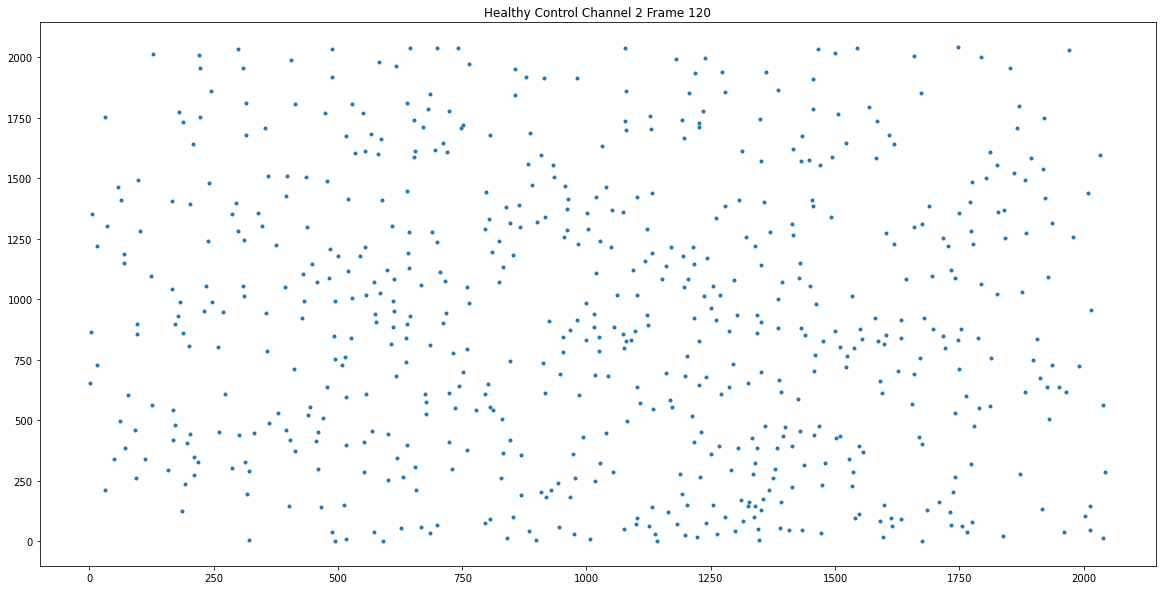

In [33]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(hcf120['centroid X'],hcf120['centroid Y'], '.')
ax.set_title('Healthy Control Channel 2 Frame 120')

In [36]:
hc_ginis = []
for i in range(hc_ch2_data['Frame'].max()+1):
    frame = hc_ch2_data[hc_ch2_data['Frame']==i]
    c = Analytics.count_cells(frame, num_rows = 10)
    g = Analytics.Gini(c)
    hc_ginis.append(g)

Text(0.5, 1.0, 'Gini Coefficient across HC Channel 2 Frames')

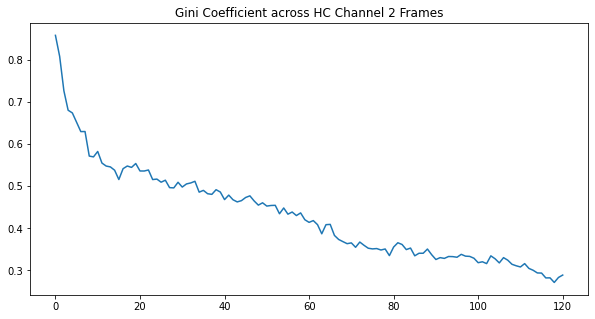

In [45]:
f, a = plt.subplots(figsize=(10,5))
a.plot(np.arange(hc_ch2_data['Frame'].max()+1),hc_ginis)
plt.title('Gini Coefficient across HC Channel 2 Frames')

## Some Numbers
Now with these graphs visually showing difference in CH2 numbers between HC and ME samples.

In [39]:
hc_ch2_data

,Frame,cell,area,centroid,centroid X,centroid Y
0,0,0,324.347998,"(1085.7102, 317.0291)",1085.71020,317.029100
1,0,1,490.671543,"(1228.7125, 1711.7137)",1228.71250,1711.713700
2,0,2,453.907474,"(1143.5842, 1102.3333)",1143.58420,1102.333300
3,0,3,550.861455,"(605.8128, 1589.4265)",605.81280,1589.426500
4,0,4,883.050453,"(915.3348, 217.10045)",915.33480,217.100450
...,...,...,...,...,...,...
46155,120,622,1007.974522,"(210.17886, 350.80136)",210.17886,350.801360
46156,120,623,1195.527311,"(1731.8676, 122.056114)",1731.86760,122.056114
46157,120,624,395.679659,"(899.92926, 1321.9385)",899.92926,1321.938500
46158,120,625,3709.542738,"(201.70946, 1393.9102)",201.70946,1393.910200


In [69]:
me_ch2_data.loc[me_ch2_data['Frame'] == 2, 'cell']

883       0
884       1
885       2
886       3
887       4
       ... 
1141    258
1142    259
1143    260
1144    261
1145    262
Name: cell, Length: 263, dtype: int64

In [86]:
me_cell_counts = []
hc_cell_counts = []
for i in range(me_ch2_data['Frame'].max()+1):
    if i < 121:
        hc_cells = hc_ch2_data.loc[hc_ch2_data['Frame'] == i, 'cell']  
        hc_cell_counts.append(len(hc_cells))
    if i % 2 == 0:
        me_cells = me_ch2_data.loc[me_ch2_data['Frame'] == i, 'cell']
        me_cell_counts.append(len(me_cells))
me_cell_counts = np.asarray(me_cell_counts)
hc_cell_counts = np.asarray(hc_cell_counts)

In [96]:
me_stats, hc_stats = {}, {}
me_stats['Min'] = me_cell_counts.min()
me_stats['Max'] = me_cell_counts.max()
me_stats['Average'] = me_cell_counts.mean()
me_stats['Std'] = me_cell_counts.std()
hc_stats['Min'] = hc_cell_counts.min()
hc_stats['Max'] = hc_cell_counts.max()
hc_stats['Average'] = hc_cell_counts.mean()
hc_stats['Std'] = hc_cell_counts.std()
print(me_stats, '\n',hc_stats)

{'Min': 263, 'Max': 1128, 'Average': 904.2066115702479, 'Std': 167.91413180184233} 
 {'Min': 16, 'Max': 627, 'Average': 381.4876033057851, 'Std': 137.96365048296758}


In [88]:
hc_cell_counts.mean()

381.4876033057851

In [89]:
hc_cell_counts

array([ 16,  29,  45,  61,  78,  97, 120, 130, 190, 165, 172, 188, 200,
       212, 220, 274, 240, 241, 250, 252, 260, 257, 263, 270, 271, 276,
       284, 291, 298, 296, 308, 305, 308, 312, 315, 312, 315, 320, 320,
       320, 323, 324, 323, 320, 328, 336, 337, 339, 344, 348, 354, 359,
       368, 372, 377, 378, 389, 390, 395, 394, 392, 390, 397, 411, 416,
       421, 421, 426, 424, 432, 433, 432, 429, 438, 435, 447, 449, 451,
       455, 474, 470, 475, 477, 473, 486, 475, 478, 443, 441, 445, 440,
       447, 441, 442, 460, 503, 512, 516, 512, 532, 518, 537, 528, 521,
       527, 537, 532, 540, 546, 547, 606, 593, 589, 598, 586, 570, 619,
       599, 593, 627, 627])

In [90]:
me_cell_counts

array([ 646,  263,  305,  413,  490,  543,  582,  639,  671,  677,  692,
        712,  716,  731,  731,  737,  732,  745,  747,  760,  763,  770,
        774,  783,  777,  786,  795,  793,  802,  813,  806,  805,  815,
        817,  822,  823,  829,  826,  831,  840,  848,  843,  855,  851,
        862,  871,  874,  834,  876,  861,  854,  890,  901,  905,  873,
        929,  880,  927,  940,  944,  899,  909,  905,  976,  996,  951,
        965,  972,  964,  969,  962,  963, 1026, 1022, 1034,  990, 1038,
       1049, 1047, 1047, 1046, 1060, 1011, 1014, 1020, 1020, 1031, 1037,
       1099, 1039, 1034, 1052, 1057, 1073, 1054, 1128, 1059, 1085, 1063,
       1077, 1071, 1079, 1060, 1079, 1066, 1062, 1068, 1069, 1076, 1070,
       1078, 1067, 1079, 1066, 1071, 1083, 1063, 1069, 1060, 1053, 1057])

Now lets compute the average change in cell counts between frames.

In [99]:
hcc = []
mec = []
for i in range(len(hc_cell_counts)):
    if i == 0:
        continue
    else:
        hc_diff = hc_cell_counts[i]-hc_cell_counts[i-1]
        hcc.append(hc_diff)
        me_diff = me_cell_counts[i]-me_cell_counts[i-1]
        mec.append(me_diff)
hcc = np.asarray(hcc)
mec = np.asarray(mec)


In [101]:
hcc.mean()

5.091666666666667

In [103]:
mec.mean()

3.425

## We now will process the data for the CH3 and CH4 data between ME and Healthy control.

In [2]:
hc_ch2_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH2_Data.csv')
hc_ch3_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH3_Data.csv')
hc_ch4_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/HC_CH4_Data.csv')
me_ch2_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/ME_CH2_Data.csv')
me_ch3_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/ME_CH3_Data.csv')
me_ch4_data = pd.read_csv('/mnt/c/Users/hfriz/OneDrive/Documents/AcademicsResearchProjects/StanfordGenetics-Neutraphils/ME_CH4_Data.csv')                       

In [18]:
hc_ch2_frame_stats = Analytics.sample_ch_stats(hc_ch2_data, title = 'HC CH2', frame_counts=True)
hc_ch3_frame_stats = Analytics.sample_ch_stats(hc_ch3_data, title = 'HC CH3', frame_counts=True)
hc_ch4_frame_stats = Analytics.sample_ch_stats(hc_ch4_data, title = 'HC CH4', frame_counts=True)
me_ch2_frame_stats = Analytics.sample_ch_stats(me_ch2_data, title = 'ME CH2', frame_counts=True)
me_ch3_frame_stats = Analytics.sample_ch_stats(me_ch3_data, title = 'ME CH3', frame_counts=True)
me_ch4_frame_stats = Analytics.sample_ch_stats(me_ch4_data, title = 'ME CH4', frame_counts=True)

# `Analytics.sample_stats` is currently under construction do not use.

In [8]:
hc_stats = pd.concat([hc_ch2_frame_stats,hc_ch3_frame_stats,hc_ch4_frame_stats], axis=1)

In [32]:
hc_stats.loc[:'Frame120 Count']

,HC CH2,HC CH3,HC CH4,CH2/CH3
Frame0 Count,16.0,1240.0,1205.0,0.012903
Frame1 Count,29.0,1276.0,1235.0,0.022727
Frame2 Count,45.0,1283.0,1223.0,0.035074
Frame3 Count,61.0,1279.0,1212.0,0.047694
Frame4 Count,78.0,1299.0,1222.0,0.060046
...,...,...,...,...
Frame116 Count,619.0,1148.0,1256.0,0.539199
Frame117 Count,599.0,1167.0,1224.0,0.513282
Frame118 Count,593.0,1182.0,1166.0,0.501692
Frame119 Count,627.0,1159.0,1255.0,0.540984


In [17]:
hc_stats['CH2/CH3'] = hc_stats['HC CH2']/hc_stats['HC CH3']
hc_stats['CH2/CH3'].loc[:'Frame120 Count'].mean()

0.3198593585047956

In [31]:
me_stats = pd.concat([me_ch2_frame_stats,me_ch3_frame_stats,me_ch4_frame_stats], axis = 1)
me_stats['CH2/CH3'] = me_stats['ME CH2']/me_stats['ME CH3']
me_stats['CH2/CH3'].loc[:'Frame240 Count'].mean()

0.8400059617403648

In [28]:
me_stats.loc[:'Frame240 Count']

,ME CH2,ME CH3,ME CH4,CH2/CH3
Frame0 Count,646.0,1263.0,1230.0,0.511481
Frame1 Count,237.0,1240.0,994.0,0.191129
Frame2 Count,263.0,1246.0,1012.0,0.211075
Frame3 Count,275.0,1246.0,1017.0,0.220706
Frame4 Count,305.0,1254.0,1008.0,0.243222
...,...,...,...,...
Frame236 Count,1060.0,937.0,1032.0,1.131270
Frame237 Count,1063.0,911.0,1024.0,1.166850
Frame238 Count,1053.0,925.0,1020.0,1.138378
Frame239 Count,1063.0,912.0,1024.0,1.165570


In [8]:
comp = pd.concat([hc_stats,me_stats], axis = 1)
comp

,HC CH2,HC CH3,HC CH4,ME CH 2,ME CH 3,ME CH 4
Min Count,16.000000,1066.000000,1133.000000,237.000000,911.000000,994.000000
Max Count,627.000000,1299.000000,1311.000000,1132.000000,1272.000000,1316.000000
Average Count,381.487603,1205.148760,1227.504132,905.161826,1103.979253,1182.634855
Std Count,137.963650,41.036299,34.358615,171.364292,103.714516,96.600900
Avg Count ROC,5.091667,-0.616667,0.200000,1.712500,-1.458333,-0.904167
Min Gini Index,0.271424,0.194044,0.198268,0.208821,0.196852,0.178884
Max Gini Index,0.858750,0.241206,0.259599,0.427215,0.226179,0.236598
Avg Gini Index,0.431357,0.220364,0.233947,0.251722,0.208633,0.216638


In [13]:
hc_234_data = pd.concat([hc_ch2_data,hc_ch3_data,hc_ch4_data])
hc_234_data

,Frame,cell,area,centroid,centroid X,centroid Y
0,0,0,324.347998,"(1085.7102, 317.0291)",1085.7102,317.029100
1,0,1,490.671543,"(1228.7125, 1711.7137)",1228.7125,1711.713700
2,0,2,453.907474,"(1143.5842, 1102.3333)",1143.5842,1102.333300
3,0,3,550.861455,"(605.8128, 1589.4265)",605.8128,1589.426500
4,0,4,883.050453,"(915.3348, 217.10045)",915.3348,217.100450
...,...,...,...,...,...,...
148523,120,1224,1613.571174,"(753.8298, 1060.9384)",753.8298,1060.938400
148524,120,1225,1321.000727,"(1651.1748, 1305.4326)",1651.1748,1305.432600
148525,120,1226,628.377144,"(1952.378, 38.848995)",1952.3780,38.848995
148526,120,1227,956.661635,"(1823.2079, 2024.5966)",1823.2079,2024.596600
